In [1]:
import numpy as np
import pandas as pd
import re

In [2]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('gurgaon_properties_cleaned_v1.csv')

In [4]:
df.duplicated().sum()

np.int64(122)

In [5]:
df.head(1)
# focus is on -> areaWithType, additionalRoom, agePossession, furnishDetails, features 

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features
0,flat,tata gurgaon gateway,sector 113,3.21,11825.0,2715.0,Super Built up area 2520(234.12 sq.m.),3,3,3,not available,9.0,NaN,0 to 1 Year Old,"['Dwarka Sector 21 Metro Station', 'Gurgaon Dreamz Mall', 'Dwarka Expressway', 'Delhi Jaipur Highway', 'Dwarka Expy', 'Red Roses Public School', 'The NorthCap University', 'Mount Carmel School', 'Metro Hospital, Palam Vihar', 'Indira Gandhi International Airport', 'DLF Corporate Park', 'The Oberoi, Gurgaon']",NaN,"['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']"


## 1. areaWithType

In [6]:
df.sample(5)[['price','area','areaWithType']]

,price,area,areaWithType
3086,4.86,1875.0,Super Built up area 1875(174.19 sq.m.)
856,1.25,1423.0,Carpet area: 1423 (132.2 sq.m.)
901,0.80,1519.0,Carpet area: 1519 (141.12 sq.m.)
802,3.60,3020.0,Carpet area: 3020 (280.57 sq.m.)
318,0.95,1360.0,Super Built up area 1360(126.35 sq.m.)Built Up area: 1260 sq.ft. (117.06 sq.m.)Carpet area: 894 sq.ft. (83.06 sq.m.)


In [7]:
# This function extracts the Super Built up area
def get_super_built_up_area(text):
    match = re.search(r'Super Built up area (\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [8]:
# This function extracts the Built Up area or Carpet area
def get_area(text, area_type):
    match = re.search(area_type + r'\s*:\s*(\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [9]:
# This function checks if the area is provided in sq.m. and converts it to sqft if needed
def convert_to_sqft(text, area_value):
    if area_value is None:
        return None
    match = re.search(r'{} \((\d+\.?\d*) sq.m.\)'.format(area_value), text)
    if match:
        sq_m_value = float(match.group(1))
        return sq_m_value * 10.7639  # conversion factor from sq.m. to sqft
    return area_value

In [10]:
# Extract Super Built up area and convert to sqft if needed
df['super_built_up_area'] = df['areaWithType'].apply(get_super_built_up_area)
df['super_built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['super_built_up_area']), axis=1)

# Extract Built Up area and convert to sqft if needed
df['built_up_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Built Up area'))
df['built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['built_up_area']), axis=1)

# Extract Carpet area and convert to sqft if needed
df['carpet_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Carpet area'))
df['carpet_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['carpet_area']), axis=1)

In [11]:
df[['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].sample(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
1682,4.20,flat,2125.0,Super Built up area 2150(199.74 sq.m.),2150.0,NaN,NaN
419,2.10,flat,1503.0,Super Built up area 1381(128.3 sq.m.),1381.0,NaN,NaN
3539,4.10,flat,2908.0,Super Built up area 2905(269.88 sq.m.),2905.0,NaN,NaN
502,3.00,house,1557.0,Plot area 173(144.65 sq.m.),NaN,NaN,NaN
2223,3.35,house,6000.0,Built Up area: 6000 (557.42 sq.m.),NaN,6000.0,NaN


In [12]:
df.duplicated().sum()

np.int64(122)

In [13]:
df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].shape

(534, 7)

In [14]:
df[df['areaWithType'].str.contains('Plot')][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].head(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
2,4.5,house,1152.0,Plot area 128(107.02 sq.m.),NaN,NaN,NaN
11,7.0,house,5400.0,Plot area 600(501.68 sq.m.),NaN,NaN,NaN
13,8.5,house,3240.0,Plot area 360(301.01 sq.m.),NaN,NaN,NaN
32,18.5,house,7000.0,Plot area 7000(650.32 sq.m.),NaN,NaN,NaN
39,1.5,house,1300.0,Plot area 1300(120.77 sq.m.),NaN,NaN,NaN


In [15]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                    18
price_per_sqft           18
area                     18
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
floorNum                 19
facing                 1105
agePossession             1
nearbyLocations         177
furnishDetails          981
features                635
super_built_up_area    1888
built_up_area          2616
carpet_area            1859
dtype: int64

In [16]:
all_nan_df = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']]

In [17]:
all_nan_df.head()

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
2,4.5,house,1152.0,Plot area 128(107.02 sq.m.),NaN,NaN,NaN
11,7.0,house,5400.0,Plot area 600(501.68 sq.m.),NaN,NaN,NaN
13,8.5,house,3240.0,Plot area 360(301.01 sq.m.),NaN,NaN,NaN
32,18.5,house,7000.0,Plot area 7000(650.32 sq.m.),NaN,NaN,NaN
39,1.5,house,1300.0,Plot area 1300(120.77 sq.m.),NaN,NaN,NaN


In [18]:
all_nan_index = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].index

In [19]:
# Function to extract plot area from 'areaWithType' column
def extract_plot_area(area_with_type):
    match = re.search(r'Plot area (\d+\.?\d*)', area_with_type)
    return float(match.group(1)) if match else None

In [20]:
all_nan_df['built_up_area'] = all_nan_df['areaWithType'].apply(extract_plot_area)

# Update the original dataframe
#gurgaon_properties.update(filtered_rows)

In [21]:
all_nan_df

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
2,4.50,house,1152.0,Plot area 128(107.02 sq.m.),NaN,128.00,NaN
11,7.00,house,5400.0,Plot area 600(501.68 sq.m.),NaN,600.00,NaN
13,8.50,house,3240.0,Plot area 360(301.01 sq.m.),NaN,360.00,NaN
32,18.50,house,7000.0,Plot area 7000(650.32 sq.m.),NaN,7000.00,NaN
39,1.50,house,1300.0,Plot area 1300(120.77 sq.m.),NaN,1300.00,NaN
55,8.50,house,3240.0,Plot area 360(301.01 sq.m.),NaN,360.00,NaN
57,9.00,house,3240.0,Plot area 360(301.01 sq.m.),NaN,360.00,NaN
62,4.00,house,1503.0,Plot area 167(139.63 sq.m.),NaN,167.00,NaN
63,15.10,house,8116.0,Plot area 754,NaN,754.00,NaN
67,7.35,house,1760.0,Plot area 240(200.67 sq.m.),NaN,240.00,NaN


In [22]:
def convert_scale(row):
    if np.isnan(row['area']) or np.isnan(row['built_up_area']):
        return row['built_up_area']
    else:
        if round(row['area']/row['built_up_area']) == 9.0:
            return row['built_up_area'] * 9
        elif round(row['area']/row['built_up_area']) == 11.0:
            return row['built_up_area'] * 10.7
        else:
            return row['built_up_area']

In [23]:
all_nan_df['built_up_area'] = all_nan_df.apply(convert_scale,axis=1)

In [24]:
all_nan_df

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
2,4.50,house,1152.0,Plot area 128(107.02 sq.m.),NaN,1152.00,NaN
11,7.00,house,5400.0,Plot area 600(501.68 sq.m.),NaN,5400.00,NaN
13,8.50,house,3240.0,Plot area 360(301.01 sq.m.),NaN,3240.00,NaN
32,18.50,house,7000.0,Plot area 7000(650.32 sq.m.),NaN,7000.00,NaN
39,1.50,house,1300.0,Plot area 1300(120.77 sq.m.),NaN,1300.00,NaN
55,8.50,house,3240.0,Plot area 360(301.01 sq.m.),NaN,3240.00,NaN
57,9.00,house,3240.0,Plot area 360(301.01 sq.m.),NaN,3240.00,NaN
62,4.00,house,1503.0,Plot area 167(139.63 sq.m.),NaN,1503.00,NaN
63,15.10,house,8116.0,Plot area 754,NaN,8067.80,NaN
67,7.35,house,1760.0,Plot area 240(200.67 sq.m.),NaN,240.00,NaN


In [25]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area
0,flat,tata gurgaon gateway,sector 113,3.21,11825.0,2715.0,Super Built up area 2520(234.12 sq.m.),3,3,3,not available,9.0,NaN,0 to 1 Year Old,"['Dwarka Sector 21 Metro Station', 'Gurgaon Dreamz Mall', 'Dwarka Expressway', 'Delhi Jaipur Highway', 'Dwarka Expy', 'Red Roses Public School', 'The NorthCap University', 'Mount Carmel School', 'Metro Hospital, Palam Vihar', 'Indira Gandhi International Airport', 'DLF Corporate Park', 'The Oberoi, Gurgaon']",NaN,"['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']",2520.0,NaN,NaN
1,flat,ambience creacions,sector 22,1.99,15546.0,1280.0,Super Built up area 1380(128.21 sq.m.)Built Up area: 1285 sq.ft. (119.38 sq.m.)Carpet area: 1280 sq.ft. (118.92 sq.m.),2,2,2,not available,9.0,North-East,0 to 1 Year Old,"['Moulsari Avenue', 'Ambience Mall', 'Old Delhi Gurgaon Road', 'Gurgaon - Delhi Expy', 'Rotary Public School', 'The NorthCap University', 'Manipal Hospital, Palam Vihar', 'Indira Gandhi International Airport', 'Gurgaon Railway Station', 'Candor Techspace', 'Hyatt Place Gurgaon Udyog Vihar', 'Fun N Food WaterPark', 'Hamoni Golf Camp', 'Tau DeviLal Sports Complex']","['1 Bed', '1 Wardrobe', '1 Fan', '1 Geyser', '1 Light', 'No AC', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']",1380.0,1285.0,1280.0
2,house,independent,sector 43,4.50,39062.0,1152.0,Plot area 128(107.02 sq.m.),20,20,3+,servant room,4.0,East,1 to 5 Year Old,"['Huda city centre metro station', 'New Life Church', 'Hanuman Mandir', 'Hdfc bank ATM', 'Standard chartered ATM', 'Hdfc ATM', 'Rbs ATM', 'Kotak mahindra bank ATM', 'Standard chartered ATM', 'Citi bank ATM', 'Icici ATM', 'Axis bank ATM', 'Hdfc ATM', 'Dr. Naval Mendiratta', 'Fortis Memorial Research Institute Fortis Vivekanand Hospital', 'Gupta', 'Dr. Kutbuddin Akbary', 'Max Hospital', 'Arihant Hospital', 'Paras Hospital Gurgaon', 'Sitaram Bhartia', 'Centre For Sight Gurgaon Sector 29', 'Guardian Pharmacy', 'Chikitsa', 'Gardian Pharmacy', 'City Medical', 'Bharat petroleum', 'Icici bank', 'Hdfc bank', 'Axis bank', 'PWO house', 'Balaji Vegetarian Paradise', 'The Chicken Boat', 'Naveidyam', 'CCD', 'Drunken Monkey', 'Belgian Waffle', 'Starbucks', 'Blue Tokai Coffee Roasters', 'Dighent cafe', 'Pizza Hut', 'Fat', 'Nowhere Brewpub and cafe', 'Stones2milestones', 'School of Inspired Leadership SOIL', 'Ncr library', 'Bahrisons library']","['1 Water Purifier', '1 Fridge', '20 Fan', '1 Exhaust Fan', '1 Dining Table', '20 Geyser', '1 Stove', '1 Curtains', '20 Bed', '20 Wardrobe', '1 Sofa', '1 Microwave', '1 Washing Machine', 'No AC', 'No Chimney', 'No Modular Kitchen', 'No Light', 'No TV']","['Water Storage', 'Park', 'Visitor Parking', 'Waste Disposal']",NaN,NaN,NaN
3,flat,shree vardhman flora,sector 90,0.65,6789.0,957.0,Super Built up area 1350(125.42 sq.m.)Built Up area: 1050 sq.ft. (97.55 sq.m.)Carpet area: 950 sq.ft. (88.26 sq.m.),2,2,3,study room,9.0,South-East,1 to 5 Year Old,"['IRIS Broadway Mall', 'Dwarka Expressway', 'Saraswati Model School', 'SGT University', 'Aarvy Healthcare Hospital', 'Indira Gandhi International Airport', 'Garhi Harsaru Junction', 'Orchid Business Park', 'Holiday Inn Gurugram Sector 90', 'Flying Wings Badminton Academy']",NaN,"['Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Shopping Centre', 'Waste Disposal']",1350.0,1050.0,950.0
4,fl

In [26]:
# additional room
# List of new columns to be created
new_cols = ['study room', 'servant room', 'store room', 'pooja room', 'others']

# Populate the new columns based on the "additionalRoom" column
for col in new_cols:
    df[col] = df['additionalRoom'].str.contains(col).astype(int)

In [27]:
df.sample(5)[['additionalRoom','study room', 'servant room', 'store room', 'pooja room', 'others']]

,additionalRoom,study room,servant room,store room,pooja room,others
130,not available,0,0,0,0,0
414,not available,0,0,0,0,0
1899,"pooja room,study room,servant room",1,1,0,1,0
1032,study room,1,0,0,0,0
1152,servant room,0,1,0,0,0


In [28]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others
0,flat,tata gurgaon gateway,sector 113,3.21,11825.0,2715.0,Super Built up area 2520(234.12 sq.m.),3,3,3,not available,9.0,NaN,0 to 1 Year Old,"['Dwarka Sector 21 Metro Station', 'Gurgaon Dreamz Mall', 'Dwarka Expressway', 'Delhi Jaipur Highway', 'Dwarka Expy', 'Red Roses Public School', 'The NorthCap University', 'Mount Carmel School', 'Metro Hospital, Palam Vihar', 'Indira Gandhi International Airport', 'DLF Corporate Park', 'The Oberoi, Gurgaon']",NaN,"['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']",2520.0,NaN,NaN,0,0,0,0,0
1,flat,ambience creacions,sector 22,1.99,15546.0,1280.0,Super Built up area 1380(128.21 sq.m.)Built Up area: 1285 sq.ft. (119.38 sq.m.)Carpet area: 1280 sq.ft. (118.92 sq.m.),2,2,2,not available,9.0,North-East,0 to 1 Year Old,"['Moulsari Avenue', 'Ambience Mall', 'Old Delhi Gurgaon Road', 'Gurgaon - Delhi Expy', 'Rotary Public School', 'The NorthCap University', 'Manipal Hospital, Palam Vihar', 'Indira Gandhi International Airport', 'Gurgaon Railway Station', 'Candor Techspace', 'Hyatt Place Gurgaon Udyog Vihar', 'Fun N Food WaterPark', 'Hamoni Golf Camp', 'Tau DeviLal Sports Complex']","['1 Bed', '1 Wardrobe', '1 Fan', '1 Geyser', '1 Light', 'No AC', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']",1380.0,1285.0,1280.0,0,0,0,0,0
2,house,independent,sector 43,4.50,39062.0,1152.0,Plot area 128(107.02 sq.m.),20,20,3+,servant room,4.0,East,1 to 5 Year Old,"['Huda city centre metro station', 'New Life Church', 'Hanuman Mandir', 'Hdfc bank ATM', 'Standard chartered ATM', 'Hdfc ATM', 'Rbs ATM', 'Kotak mahindra bank ATM', 'Standard chartered ATM', 'Citi bank ATM', 'Icici ATM', 'Axis bank ATM', 'Hdfc ATM', 'Dr. Naval Mendiratta', 'Fortis Memorial Research Institute Fortis Vivekanand Hospital', 'Gupta', 'Dr. Kutbuddin Akbary', 'Max Hospital', 'Arihant Hospital', 'Paras Hospital Gurgaon', 'Sitaram Bhartia', 'Centre For Sight Gurgaon Sector 29', 'Guardian Pharmacy', 'Chikitsa', 'Gardian Pharmacy', 'City Medical', 'Bharat petroleum', 'Icici bank', 'Hdfc bank', 'Axis bank', 'PWO house', 'Balaji Vegetarian Paradise', 'The Chicken Boat', 'Naveidyam', 'CCD', 'Drunken Monkey', 'Belgian Waffle', 'Starbucks', 'Blue Tokai Coffee Roasters', 'Dighent cafe', 'Pizza Hut', 'Fat', 'Nowhere Brewpub and cafe', 'Stones2milestones', 'School of Inspired Leadership SOIL', 'Ncr library', 'Bahrisons library']","['1 Water Purifier', '1 Fridge', '20 Fan', '1 Exhaust Fan', '1 Dining Table', '20 Geyser', '1 Stove', '1 Curtains', '20 Bed', '20 Wardrobe', '1 Sofa', '1 Microwave', '1 Washing Machine', 'No AC', 'No Chimney', 'No Modular Kitchen', 'No Light', 'No TV']","['Water Storage', 'Park', 'Visitor Parking', 'Waste Disposal']",NaN,NaN,NaN,0,1,0,0,0
3,flat,shree vardhman flora,sector 90,0.65,6789.0,957.0,Super Built up area 1350(125.42 sq.m.)Built Up area: 1050 sq.ft. (97.55 sq.m.)Carpet area: 950 sq.ft. (88.26 sq.m.),2,2,3,study room,9.0,South-East,1 to 5 Year Old,"['IRIS Broadway Mall', 'Dwarka Expressway', 'Saraswati Model School', 'SGT University', 'Aarvy Healthcare Hospital', 'Indira Gandhi International Airport', 'Garhi Harsaru Junction', 'Orchid Business Park', 'Holiday Inn Gurugram Sector 90', 'Flying Wings Badminton Academy']",NaN,"['Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking', 'Security Personnel', 'Natural L

## 3.agePossession

In [29]:
df['agePossession'].value_counts()

agePossession
1 to 5 Year Old       1676
5 to 10 Year Old       575
0 to 1 Year Old        530
undefined              332
10+ Year Old           310
Under Construction      90
Within 6 months         70
Within 3 months         26
Dec 2023                22
By 2023                 19
By 2024                 17
Dec 2024                16
Mar 2024                14
Oct 2024                 8
Jan 2024                 8
Dec 2025                 7
Jun 2024                 7
Aug 2023                 7
Nov 2023                 5
By 2025                  4
Jul 2024                 4
Sep 2023                 4
Oct 2023                 4
Aug 2024                 4
Feb 2024                 3
May 2024                 3
Jan 2025                 3
Nov 2024                 3
Aug 2025                 2
Oct 2025                 2
Jul 2027                 2
Sep 2025                 2
Jun 2027                 2
By 2027                  2
Jan 2026                 2
Dec 2026                 2
Mar 2025      

In [30]:
def categorize_age_possession(value):
    if pd.isna(value):
        return "Undefined"
    if "0 to 1 Year Old" in value or "Within 6 months" in value or "Within 3 months" in value:
        return "New Property"
    if "1 to 5 Year Old" in value:
        return "Relatively New"
    if "5 to 10 Year Old" in value:
        return "Moderately Old"
    if "10+ Year Old" in value:
        return "Old Property"
    if "Under Construction" in value or "By" in value:
        return "Under Construction"
    try:
        # For entries like 'May 2024'
        int(value.split(" ")[-1])
        return "Under Construction"
    except:
        return "Undefined"

In [31]:
df['agePossession'] = df['agePossession'].apply(categorize_age_possession)

In [32]:
df['agePossession'].value_counts()

agePossession
Relatively New        1676
New Property           626
Moderately Old         575
Undefined              333
Old Property           310
Under Construction     283
Name: count, dtype: int64

In [33]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others
0,flat,tata gurgaon gateway,sector 113,3.21,11825.0,2715.0,Super Built up area 2520(234.12 sq.m.),3,3,3,not available,9.0,NaN,New Property,"['Dwarka Sector 21 Metro Station', 'Gurgaon Dreamz Mall', 'Dwarka Expressway', 'Delhi Jaipur Highway', 'Dwarka Expy', 'Red Roses Public School', 'The NorthCap University', 'Mount Carmel School', 'Metro Hospital, Palam Vihar', 'Indira Gandhi International Airport', 'DLF Corporate Park', 'The Oberoi, Gurgaon']",NaN,"['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']",2520.0,NaN,NaN,0,0,0,0,0
1,flat,ambience creacions,sector 22,1.99,15546.0,1280.0,Super Built up area 1380(128.21 sq.m.)Built Up area: 1285 sq.ft. (119.38 sq.m.)Carpet area: 1280 sq.ft. (118.92 sq.m.),2,2,2,not available,9.0,North-East,New Property,"['Moulsari Avenue', 'Ambience Mall', 'Old Delhi Gurgaon Road', 'Gurgaon - Delhi Expy', 'Rotary Public School', 'The NorthCap University', 'Manipal Hospital, Palam Vihar', 'Indira Gandhi International Airport', 'Gurgaon Railway Station', 'Candor Techspace', 'Hyatt Place Gurgaon Udyog Vihar', 'Fun N Food WaterPark', 'Hamoni Golf Camp', 'Tau DeviLal Sports Complex']","['1 Bed', '1 Wardrobe', '1 Fan', '1 Geyser', '1 Light', 'No AC', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']",1380.0,1285.0,1280.0,0,0,0,0,0
2,house,independent,sector 43,4.50,39062.0,1152.0,Plot area 128(107.02 sq.m.),20,20,3+,servant room,4.0,East,Relatively New,"['Huda city centre metro station', 'New Life Church', 'Hanuman Mandir', 'Hdfc bank ATM', 'Standard chartered ATM', 'Hdfc ATM', 'Rbs ATM', 'Kotak mahindra bank ATM', 'Standard chartered ATM', 'Citi bank ATM', 'Icici ATM', 'Axis bank ATM', 'Hdfc ATM', 'Dr. Naval Mendiratta', 'Fortis Memorial Research Institute Fortis Vivekanand Hospital', 'Gupta', 'Dr. Kutbuddin Akbary', 'Max Hospital', 'Arihant Hospital', 'Paras Hospital Gurgaon', 'Sitaram Bhartia', 'Centre For Sight Gurgaon Sector 29', 'Guardian Pharmacy', 'Chikitsa', 'Gardian Pharmacy', 'City Medical', 'Bharat petroleum', 'Icici bank', 'Hdfc bank', 'Axis bank', 'PWO house', 'Balaji Vegetarian Paradise', 'The Chicken Boat', 'Naveidyam', 'CCD', 'Drunken Monkey', 'Belgian Waffle', 'Starbucks', 'Blue Tokai Coffee Roasters', 'Dighent cafe', 'Pizza Hut', 'Fat', 'Nowhere Brewpub and cafe', 'Stones2milestones', 'School of Inspired Leadership SOIL', 'Ncr library', 'Bahrisons library']","['1 Water Purifier', '1 Fridge', '20 Fan', '1 Exhaust Fan', '1 Dining Table', '20 Geyser', '1 Stove', '1 Curtains', '20 Bed', '20 Wardrobe', '1 Sofa', '1 Microwave', '1 Washing Machine', 'No AC', 'No Chimney', 'No Modular Kitchen', 'No Light', 'No TV']","['Water Storage', 'Park', 'Visitor Parking', 'Waste Disposal']",NaN,NaN,NaN,0,1,0,0,0
3,flat,shree vardhman flora,sector 90,0.65,6789.0,957.0,Super Built up area 1350(125.42 sq.m.)Built Up area: 1050 sq.ft. (97.55 sq.m.)Carpet area: 950 sq.ft. (88.26 sq.m.),2,2,3,study room,9.0,South-East,Relatively New,"['IRIS Broadway Mall', 'Dwarka Expressway', 'Saraswati Model School', 'SGT University', 'Aarvy Healthcare Hospital', 'Indira Gandhi International Airport', 'Garhi Harsaru Junction', 'Orchid Business Park', 'Holiday Inn Gurugram Sector 90', 'Flying Wings Badminton Academy']",NaN,"['Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking', 'Security Personnel', 'Natural Light', '

## 4.furnishDetails

In [34]:
df.sample(5)[['furnishDetails','features']]

,furnishDetails,features
1408,NaN,"['Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Separate entry for servant room', 'Recently Renovated', 'Piped-gas', 'Visitor Parking', 'Park', 'Security Personnel', 'Natural Light', 'Waste Disposal']"
1050,"['1 Water Purifier', '1 Fridge', '12 Fan', '1 Exhaust Fan', '12 Geyser', '1 Stove', '12 Light', '1 Curtains', '12 Wardrobe', '12 Bed', '1 Sofa', '1 Microwave', '1 Washing Machine', 'No AC', 'No Chimney', 'No Dining Table', 'No Modular Kitchen', 'No TV']","['Maintenance Staff', 'Water Storage', 'Visitor Parking', 'Waste Disposal']"
2561,"['4 Wardrobe', '1 Water Purifier', '12 Fan', '1 Exhaust Fan', '6 Geyser', '1 Stove', '9 Light', '1 Chimney', '1 Modular Kitchen', '7 AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No TV', 'No Washing Machine']","['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"
1171,[],"['Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center', 'Water softening plant']"
569,"['1 Water Purifier', '2 Fan', '1 Fridge', '1 Exhaust Fan', '1 Dining Table', '1 Geyser', '1 Stove', '1 Light', '1 TV', '1 Modular Kitchen', '1 Chimney', '1 Curtains', '1 Wardrobe', '1 Sofa', '1 Washing Machine', '1 Microwave', 'No AC', 'No Bed']","['Water purifier', 'Centrally Air Conditioned', 'Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"


In [35]:
# Extract all unique furnishings from the furnishDetails column
all_furnishings = []
for detail in df['furnishDetails'].dropna():
    furnishings = detail.replace('[', '').replace(']', '').replace("'", "").split(', ')
    all_furnishings.extend(furnishings)
unique_furnishings = list(set(all_furnishings))

# Define a function to extract the count of a furnishing from the furnishDetails
def get_furnishing_count(details, furnishing):
    if isinstance(details, str):
        if f"No {furnishing}" in details:
            return 0
        pattern = re.compile(f"(\d+) {furnishing}")
        match = pattern.search(details)
        if match:
            return int(match.group(1))
        elif furnishing in details:
            return 1
    return 0

# Simplify the furnishings list by removing "No" prefix and numbers
columns_to_include = [re.sub(r'No |\d+', '', furnishing).strip() for furnishing in unique_furnishings]
columns_to_include = list(set(columns_to_include))  # Get unique furnishings
columns_to_include = [furnishing for furnishing in columns_to_include if furnishing]  # Remove empty strings

# Create new columns for each unique furnishing and populate with counts
for furnishing in columns_to_include:
    df[furnishing] = df['furnishDetails'].apply(lambda x: get_furnishing_count(x, furnishing))

# Create the new dataframe with the required columns
furnishings_df = df[['furnishDetails'] + columns_to_include]


In [36]:
furnishings_df.shape

(3803, 19)

In [37]:
furnishings_df.drop(columns=['furnishDetails'],inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_21272\114705885.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  furnishings_df.drop(columns=['furnishDetails'],inplace=True)


In [38]:
furnishings_df.sample(5)

,Stove,Modular Kitchen,Fridge,AC,Wardrobe,Bed,Geyser,Water Purifier,TV,Microwave,Fan,Light,Sofa,Exhaust Fan,Curtains,Chimney,Dining Table,Washing Machine
644,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1727,1,1,0,5,3,0,3,0,0,0,0,0,0,1,4,1,0,0
2225,0,1,0,0,4,0,2,1,0,0,10,10,0,1,0,1,0,0
3468,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3737,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [39]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [40]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(furnishings_df)

In [41]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss_reduced.append(kmeans.inertia_)

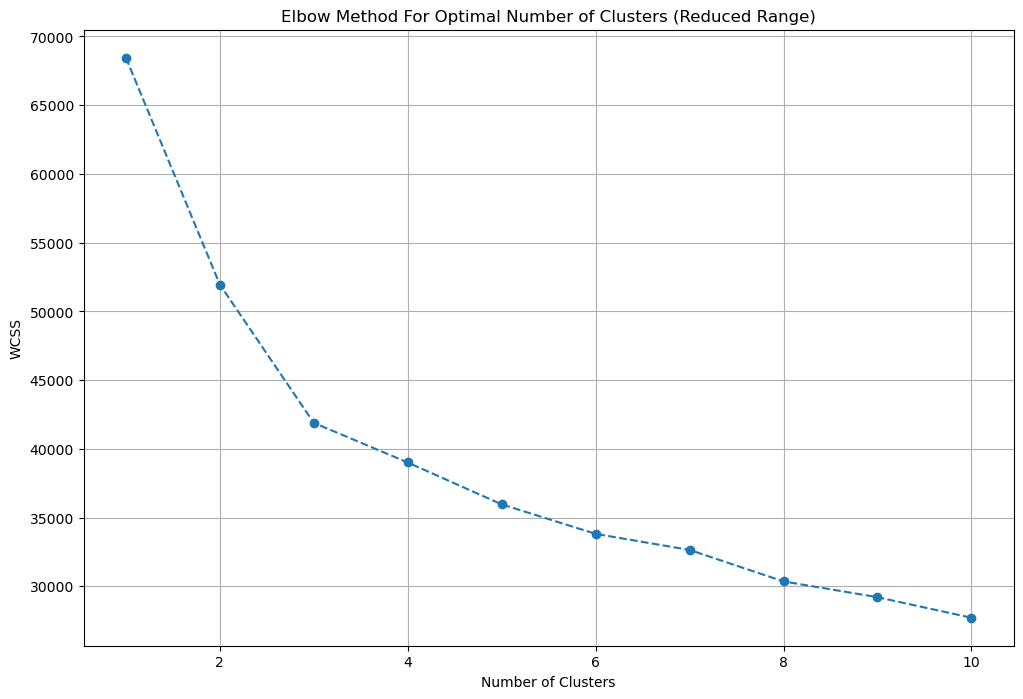

In [42]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [43]:
n_clusters = 3

# Fit the KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(scaled_data)

# Predict the cluster assignments for each row
cluster_assignments = kmeans.predict(scaled_data)

In [44]:
df = df.iloc[:,:-18]

In [45]:
df['furnishing_type'] = cluster_assignments

In [46]:
df.sample(5)[['furnishDetails','furnishing_type']]
# 0 -> unfurnished
# 1 -> semifurnished
# 2 -> furnished

,furnishDetails,furnishing_type
1,"['1 Bed', '1 Wardrobe', '1 Fan', '1 Geyser', '1 Light', 'No AC', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']",1
2764,NaN,1
2520,"['1 Modular Kitchen', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",1
3232,NaN,1
784,"['5 Fan', '1 Exhaust Fan', '2 Geyser', '10 Light', '4 AC', '1 Chimney', '1 Curtains', '1 Modular Kitchen', '2 Wardrobe', 'No Bed', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']",0


## 5.features

In [47]:
df[['society','features']].sample(5)

,society,features
3431,puri diplomatic greens,"['Power Back-up', 'Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Swimming Pool', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking', 'Fitness Centre / GYM', 'Club house / Community Center']"
1364,sare homes,"['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']"
404,siddhartha apartment,"['Security / Fire Alarm', 'Lift(s)', 'Maintenance Staff', 'Water Storage']"
3518,smart world gems,"['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'No open drainage around', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Club house / Community Center']"
1178,indiabulls enigma,"['Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Water purifier', 'High Ceiling Height', 'Maintenance Staff', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Visitor Parking', 'Swimming Pool', 'Park', 'Natural Light', 'Internet/wi-fi connectivity', 'Airy Rooms', 'Low Density Society', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']"


In [48]:
df['features'].isnull().sum()

np.int64(635)

In [49]:
import pandas as pd
app_df = pd.read_csv('appartments.csv')
app_df.head(2)

,PropertyName,PropertySubName,NearbyLocations,LocationAdvantages,Link,PriceDetails,TopFacilities
0,Smartworld One DXP,"2, 3, 4 BHK Apartment in Sector 113, Gurgaon","['Bajghera Road', 'Palam Vihar Halt', 'DPSG Palam Vihar', 'Park Hospital', 'Gurgaon Railway Station']","{'Bajghera Road': '800 Meter', 'Palam Vihar Halt': '2.5 KM', 'DPSG Palam Vihar': '3.1 KM', 'Park Hospital': '3.1 KM', 'Gurgaon Railway Station': '4.9 KM', 'The NorthCap University': '5.4 KM', 'Dwarka Expy': '1.2 KM', 'Hyatt Place Gurgaon Udyog Vihar': '7.7 KM', 'Dwarka Sector 21, Metro Station': '7.2 KM', 'Pacific D21 Mall': '7.4 KM', 'Indira Gandhi International Airport': '14.7 KM', 'Hamoni Golf Camp': '6.2 KM', 'Fun N Food Waterpark': '8.8 KM', 'Accenture DDC5': '9 KM'}",https://www.99acres.com/smartworld-one-dxp-sector-113-gurgaon-npxid-r400415,"{'2 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,370 sq.ft.', 'price-range': '₹ 2 - 2.4 Cr'}, '3 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,850 - 2,050 sq.ft.', 'price-range': '₹ 2.25 - 3.59 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '2,600 sq.ft.', 'price-range': '₹ 3.24 - 4.56 Cr'}}","['Swimming Pool', 'Salon', 'Restaurant', 'Spa', 'Cafeteria', 'Sun Deck', '24x7 Security', 'Club House', 'Gated Community']"
1,M3M Crown,"3, 4 BHK Apartment in Sector 111, Gurgaon","['DPSG Palam Vihar Gurugram', 'The NorthCap University', 'Park Hospital, Palam Vihar', 'Pacific D21 Mall', 'Palam Vihar Halt Railway Station']","{'DPSG Palam Vihar Gurugram': '1.4 Km', 'The NorthCap University': '4.4 Km', 'Park Hospital, Palam Vihar': '1.4 Km', 'Pacific D21 Mall': '8.2 Km', 'Palam Vihar Halt Railway Station': '1.2 Km', 'Dwarka Sector 21 Metro Station': '8.1 Km', 'Dwarka Expressway': '450 m', 'Fun N Food Water Park': '8.1 Km', 'Indira Gandhi International Airport': '14.1 Km', 'Tau DeviLal Sports Complex': '11.2 Km', 'Hamoni Golf Camp': '5 Km', 'Hyatt Place': '6.1 Km', 'Altrade Business Centre': '11.2 Km'}",https://www.99acres.com/m3m-crown-sector-111-gurgaon-npxid-r404068,"{'3 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '1,605 - 2,170 sq.ft.', 'price-range': '₹ 2.2 - 3.03 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '2,248 - 2,670 sq.ft.', 'price-range': '₹ 3.08 - 3.73 Cr'}}","['Bowling Alley', 'Mini Theatre', 'Manicured Garden', 'Swimming Pool', 'Flower Garden', 'Reading Lounge', 'Golf Course', 'Barbecue', 'Sauna']"


In [50]:
app_df['PropertyName'] = app_df['PropertyName'].str.lower()

In [51]:
temp_df = df[df['features'].isnull()]

In [52]:
temp_df.shape

(635, 26)

In [53]:
x = temp_df.merge(app_df,left_on='society',right_on='PropertyName',how='left')['TopFacilities']

In [54]:
df.loc[temp_df.index,'features'] = x.values

In [55]:
df['features'].isnull().sum()

np.int64(481)

In [56]:
from sklearn.preprocessing import MultiLabelBinarizer
import ast

In [57]:
# Convert the string representation of lists in the 'features' column to actual lists
df['features_list'] = df['features'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) and x.startswith('[') else [])

# Use MultiLabelBinarizer to convert the features list into a binary matrix
mlb = MultiLabelBinarizer()
features_binary_matrix = mlb.fit_transform(df['features_list'])

# Convert the binary matrix into a DataFrame
features_binary_df = pd.DataFrame(features_binary_matrix, columns=mlb.classes_)

In [58]:
features_binary_df.sample(5)

,24/7 Power Backup,24/7 Water Supply,24x7 Security,ATM,Aerobics Centre,Air Hockey,Airy Rooms,Amphitheatre,Automated Car Wash,Badminton Court,Bank Attached Property,Banquet Hall,Bar/Chill-Out Lounge,Barbecue,Basketball Court,Beach Volley Ball Court,Billiards,Bowling Alley,Bus Shelter,Business Lounge,CCTV Camera Security,Cafeteria,Car Parking,Car wash area,Card Room,Centrally Air Conditioned,Changing Area,Children's Play Area,Cigar Lounge,Clinic,Club House,Club house / Community Center,Community Hall,Concierge Service,Conference room,Creche/Day care,Cricket Pitch,Doctor on Call,Earthquake Resistant,Entrance Lobby,False Ceiling Lighting,Feng Shui / Vaastu Compliant,Fire Fighting Systems,Fitness Centre / GYM,Flower Garden,Food Court,Foosball,Football,Fountain,Gated Community,Gazebo,Golf Course,Grocery Shop,Gymnasium,High Ceiling Height,High Speed Elevators,Infinity Pool,Intercom Facility,Internal Street Lights,Internet/wi-fi connectivity,Jacuzzi,Jogging Track,Landscape Garden,Laundry,Lawn Tennis Court,Library,Lift(s),Lounge,Low Density Society,Maintenance Staff,Manicured Garden,Medical Centre,Milk Booth,Mini Theatre,Multipurpose Court,Multipurpose Hall,Natural Light,Natural Pond,No open drainage around,Park,Party Lawn,Pergola,Piped Gas,Piped-gas,Pool Table,Power Back up Lift,Power Back-up,Private Garden / Terrace,Property Staff,RO System,Rain Water Harvesting,Reading Lounge,Recently Renovated,Reflexology Park,Restaurant,Salon,Sauna,School,Security / Fire Alarm,Security Personnel,Separate entry for servant room,Sewage Treatment Plant,Shopping Centre,Skating Rink,Solar Lighting,Solar Water Heating,Spa,Spacious Interiors,Squash Court,Steam Room,Sun Deck,Swimming Pool,Temple,Terrace Garden,Theatre,Toddler Pool,Valet Parking,Vastu Compliant,Video Door Security,Visitor Parking,Visitors Parking,Volley Ball Court,Waiting Lounge,Waste Disposal,Water Softener Plant,Water Storage,Water purifier,Water softening plant,Wi-Fi Connectivity,Yoga/Meditation Area
3783,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
3776,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
37,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2040,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0


In [59]:
features_binary_df.shape

(3803, 130)

In [60]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(features_binary_df)
    wcss_reduced.append(kmeans.inertia_)

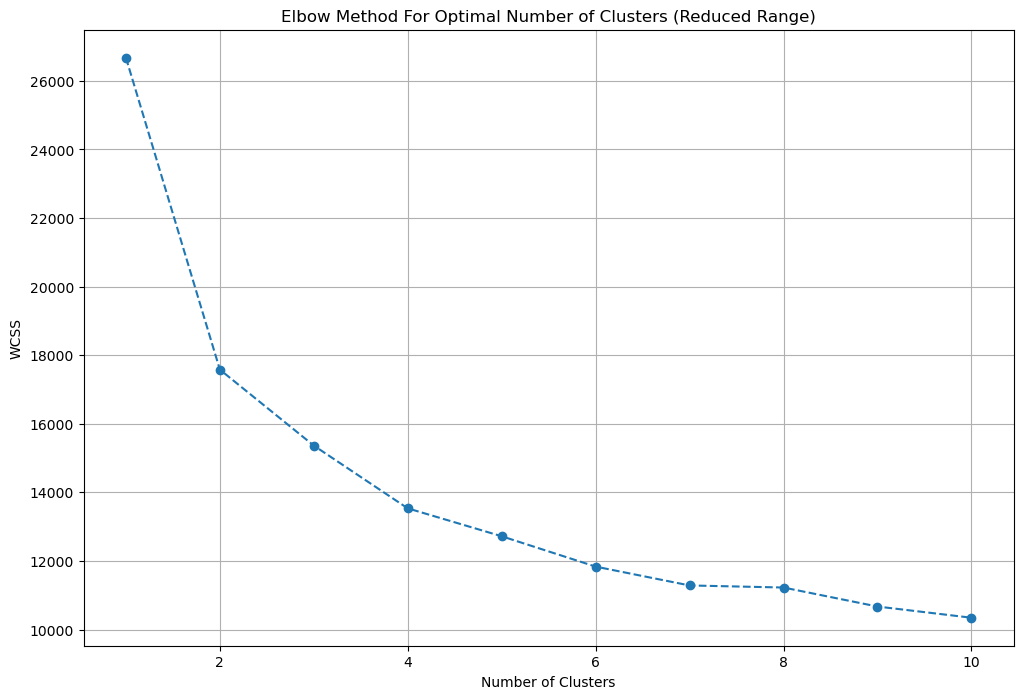

In [61]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [62]:
# Define the weights for each feature as provided
# Assigning weights based on perceived luxury contribution
weights = {
    '24/7 Power Backup': 8,
    '24/7 Water Supply': 4,
    '24x7 Security': 7,
    'ATM': 4,
    'Aerobics Centre': 6,
    'Airy Rooms': 8,
    'Amphitheatre': 7,
    'Badminton Court': 7,
    'Banquet Hall': 8,
    'Bar/Chill-Out Lounge': 9,
    'Barbecue': 7,
    'Basketball Court': 7,
    'Billiards': 7,
    'Bowling Alley': 8,
    'Business Lounge': 9,
    'CCTV Camera Security': 8,
    'Cafeteria': 6,
    'Car Parking': 6,
    'Card Room': 6,
    'Centrally Air Conditioned': 9,
    'Changing Area': 6,
    "Children's Play Area": 7,
    'Cigar Lounge': 9,
    'Clinic': 5,
    'Club House': 9,
    'Concierge Service': 9,
    'Conference room': 8,
    'Creche/Day care': 7,
    'Cricket Pitch': 7,
    'Doctor on Call': 6,
    'Earthquake Resistant': 5,
    'Entrance Lobby': 7,
    'False Ceiling Lighting': 6,
    'Feng Shui / Vaastu Compliant': 5,
    'Fire Fighting Systems': 8,
    'Fitness Centre / GYM': 8,
    'Flower Garden': 7,
    'Food Court': 6,
    'Foosball': 5,
    'Football': 7,
    'Fountain': 7,
    'Gated Community': 7,
    'Golf Course': 10,
    'Grocery Shop': 6,
    'Gymnasium': 8,
    'High Ceiling Height': 8,
    'High Speed Elevators': 8,
    'Infinity Pool': 9,
    'Intercom Facility': 7,
    'Internal Street Lights': 6,
    'Internet/wi-fi connectivity': 7,
    'Jacuzzi': 9,
    'Jogging Track': 7,
    'Landscape Garden': 8,
    'Laundry': 6,
    'Lawn Tennis Court': 8,
    'Library': 8,
    'Lounge': 8,
    'Low Density Society': 7,
    'Maintenance Staff': 6,
    'Manicured Garden': 7,
    'Medical Centre': 5,
    'Milk Booth': 4,
    'Mini Theatre': 9,
    'Multipurpose Court': 7,
    'Multipurpose Hall': 7,
    'Natural Light': 8,
    'Natural Pond': 7,
    'Park': 8,
    'Party Lawn': 8,
    'Piped Gas': 7,
    'Pool Table': 7,
    'Power Back up Lift': 8,
    'Private Garden / Terrace': 9,
    'Property Staff': 7,
    'RO System': 7,
    'Rain Water Harvesting': 7,
    'Reading Lounge': 8,
    'Restaurant': 8,
    'Salon': 8,
    'Sauna': 9,
    'Security / Fire Alarm': 9,
    'Security Personnel': 9,
    'Separate entry for servant room': 8,
    'Sewage Treatment Plant': 6,
    'Shopping Centre': 7,
    'Skating Rink': 7,
    'Solar Lighting': 6,
    'Solar Water Heating': 7,
    'Spa': 9,
    'Spacious Interiors': 9,
    'Squash Court': 8,
    'Steam Room': 9,
    'Sun Deck': 8,
    'Swimming Pool': 8,
    'Temple': 5,
    'Theatre': 9,
    'Toddler Pool': 7,
    'Valet Parking': 9,
    'Video Door Security': 9,
    'Visitor Parking': 7,
    'Water Softener Plant': 7,
    'Water Storage': 7,
    'Water purifier': 7,
    'Yoga/Meditation Area': 7
}
# Calculate luxury score for each row
luxury_score = features_binary_df[list(weights.keys())].multiply(list(weights.values())).sum(axis=1)


In [63]:
df['luxury_score'] = luxury_score

In [64]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,features_list,luxury_score
0,flat,tata gurgaon gateway,sector 113,3.21,11825.0,2715.0,Super Built up area 2520(234.12 sq.m.),3,3,3,not available,9.0,NaN,New Property,"['Dwarka Sector 21 Metro Station', 'Gurgaon Dreamz Mall', 'Dwarka Expressway', 'Delhi Jaipur Highway', 'Dwarka Expy', 'Red Roses Public School', 'The NorthCap University', 'Mount Carmel School', 'Metro Hospital, Palam Vihar', 'Indira Gandhi International Airport', 'DLF Corporate Park', 'The Oberoi, Gurgaon']",NaN,"['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']",2520.0,NaN,NaN,0,0,0,0,0,1,"[Feng Shui / Vaastu Compliant, Security / Fire Alarm, Intercom Facility, Lift(s), Maintenance Staff, Water Storage, Park, Visitor Parking]",49
1,flat,ambience creacions,sector 22,1.99,15546.0,1280.0,Super Built up area 1380(128.21 sq.m.)Built Up area: 1285 sq.ft. (119.38 sq.m.)Carpet area: 1280 sq.ft. (118.92 sq.m.),2,2,2,not available,9.0,North-East,New Property,"['Moulsari Avenue', 'Ambience Mall', 'Old Delhi Gurgaon Road', 'Gurgaon - Delhi Expy', 'Rotary Public School', 'The NorthCap University', 'Manipal Hospital, Palam Vihar', 'Indira Gandhi International Airport', 'Gurgaon Railway Station', 'Candor Techspace', 'Hyatt Place Gurgaon Udyog Vihar', 'Fun N Food WaterPark', 'Hamoni Golf Camp', 'Tau DeviLal Sports Complex']","['1 Bed', '1 Wardrobe', '1 Fan', '1 Geyser', '1 Light', 'No AC', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']",1380.0,1285.0,1280.0,0,0,0,0,0,1,"[Feng Shui / Vaastu Compliant, Security / Fire Alarm, Intercom Facility, Lift(s), Maintenance Staff, Water Storage, Park, Visitor Parking]",49
2,house,independent,sector 43,4.50,39062.0,1152.0,Plot area 128(107.02 sq.m.),20,20,3+,servant room,4.0,East,Relatively New,"['Huda city centre metro station', 'New Life Church', 'Hanuman Mandir', 'Hdfc bank ATM', 'Standard chartered ATM', 'Hdfc ATM', 'Rbs ATM', 'Kotak mahindra bank ATM', 'Standard chartered ATM', 'Citi bank ATM', 'Icici ATM', 'Axis bank ATM', 'Hdfc ATM', 'Dr. Naval Mendiratta', 'Fortis Memorial Research Institute Fortis Vivekanand Hospital', 'Gupta', 'Dr. Kutbuddin Akbary', 'Max Hospital', 'Arihant Hospital', 'Paras Hospital Gurgaon', 'Sitaram Bhartia', 'Centre For Sight Gurgaon Sector 29', 'Guardian Pharmacy', 'Chikitsa', 'Gardian Pharmacy', 'City Medical', 'Bharat petroleum', 'Icici bank', 'Hdfc bank', 'Axis bank', 'PWO house', 'Balaji Vegetarian Paradise', 'The Chicken Boat', 'Naveidyam', 'CCD', 'Drunken Monkey', 'Belgian Waffle', 'Starbucks', 'Blue Tokai Coffee Roasters', 'Dighent cafe', 'Pizza Hut', 'Fat', 'Nowhere Brewpub and cafe', 'Stones2milestones', 'School of Inspired Leadership SOIL', 'Ncr library', 'Bahrisons library']","['1 Water Purifier', '1 Fridge', '20 Fan', '1 Exhaust Fan', '1 Dining Table', '20 Geyser', '1 Stove', '1 Curtains', '20 Bed', '20 Wardrobe', '1 Sofa', '1 Microwave', '1 Washing Machine', 'No AC', 'No Chimney', 'No Modular Kitchen', 'No Light', 'No TV']","['Water Storage', 'Park', 'Visitor Parking', 'Waste Disposal']",NaN,NaN,NaN,0,1,0,0,0,2,"[Water Storage, Park, Visitor Parking, Waste Disposal]",22
3,flat,shree vardhman flora,sector 90,0.65,6789.0,957.0,Super Built up area 1350(125.42 sq.m.)Built Up area: 1050 sq.ft. (97.55 sq.m.)Carpet area: 950 sq.ft. (88.26 sq.m.),2,2,3,study room,9.0,South-East,Relatively New,"['IRIS Broadway Mall'

In [65]:
# cols to drop -> nearbyLocations,furnishDetails, features,features_list, additionalRoom
df.drop(columns=['nearbyLocations','furnishDetails','features','features_list','additionalRoom'],inplace=True)

In [66]:
df.sample(5)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1709,flat,godrej oasis,sector 88a,1.45,8367.0,1733.0,Super Built up area 161Carpet area: 108.4 sq.m.,2,2,3+,9.0,NaN,Relatively New,161.0,NaN,108.400000,1,0,0,0,0,2,85
2267,flat,umang monsoon breeze,sector 78,0.69,5390.0,1280.0,Carpet area: 1280 (118.92 sq.m.),2,2,2,11.0,NaN,Moderately Old,NaN,NaN,1280.000000,0,0,0,0,0,1,60
380,flat,siddhartha apartment,sector 95,0.72,3664.0,1965.0,Super Built up area 1965(182.55 sq.m.)Built Up area: 1800 sq.ft. (167.23 sq.m.)Carpet area: 1600 sq.ft. (148.64 sq.m.),3,3,2,4.0,East,Relatively New,1965.0,1800.0,1600.000000,0,0,0,0,1,1,21
974,flat,signature global solera 2,sector 107,0.37,6680.0,554.0,Carpet area: 553.85 (51.45 sq.m.),2,2,2,9.0,NaN,New Property,NaN,NaN,553.802655,0,0,0,0,0,1,23
3324,flat,raheja vedaanta,sector 108,1.25,5681.0,2200.0,Super Built up area 2200(204.39 sq.m.),3,2,0,0.0,NaN,Relatively New,2200.0,NaN,NaN,0,0,0,0,0,0,65


In [67]:
df.shape

(3803, 23)

In [68]:
df.to_csv('gurgaon_properties_cleaned_v2.csv',index=False)